# CT ROI Analysis
## Moving back to basics - look at all of the CTs to generate ROIs for the PET images

In [13]:
import os
import pandas as pd
import nibabel as nib
import numpy as np
import sys
sys.path.append("../")
from pyanalyze.functions import *

PET_CT_REF = pd.read_excel("D:/Hoffman/GN/Data/DCM_Partners.xlsx")
PET_CT_REF["Centre"] = [x.split("\\")[2][1:] for x in PET_CT_REF["PET"]]

centrecount, prevcentre,seriesnumlist = 1, "",[]
for index,row in PET_CT_REF.iterrows():
    if row["Centre"] != prevcentre:
        prevcentre = row["Centre"]
        centrecount = 1
        seriesnumlist.append(str(centrecount).zfill(2))
    else:
        seriesnumlist.append(str(centrecount).zfill(2))
    centrecount+=1
PET_CT_REF["SeriesNum"] = seriesnumlist

pcentre, pct, count,seriesnumlist = "", "",1,[]
for index,row in PET_CT_REF.iterrows():
    if row["Centre"] != pcentre:
        pcentre = row["Centre"]
        pct = row["CT"]
        count = 1
    elif row["Centre"] == pcentre and row["CT"] != pct:
        pct = row["CT"]
        count += 1
    seriesnumlist.append(str(count).zfill(2))
PET_CT_REF["CT_SeriesNum"] = seriesnumlist

PET_CT_REF.tail()

,PET,CT,Centre,SeriesNum,CT_SeriesNum
458,D:\Hoffman\_WMIC\Hoffman_Skull_2014_06_09\6x5m...,D:\Hoffman\CT_AllCentres\_WMIC\Hoffman_Skull_2...,WMIC,08,02
459,D:\Hoffman\_WMIC\Hoffman_Skull_2014_06_09\6x5m...,D:\Hoffman\CT_AllCentres\_WMIC\Hoffman_Skull_2...,WMIC,09,02
460,D:\Hoffman\_WMIC\Hoffman_Skull_2014_06_09\6x5m...,D:\Hoffman\CT_AllCentres\_WMIC\Hoffman_Skull_2...,WMIC,10,02
461,D:\Hoffman\_WMIC\Hoffman_Skull_2014_06_09\6x5m...,D:\Hoffman\CT_AllCentres\_WMIC\Hoffman_Skull_2...,WMIC,11,02
462,D:\Hoffman\_WMIC\Hoffman_Skull_2014_06_09\6x5m...,D:\Hoffman\CT_AllCentres\_WMIC\Hoffman_Skull_2...,WMIC,12,02


In [14]:
PET_CT_REF.drop(axis=0,index=PET_CT_REF[PET_CT_REF["PET"].str.contains(r"D:\\Hoffman\\_Glasgow\\Skull\\UK PET 10-15m Skull NToF")].index.values,inplace=True)

In [15]:
PET_CT_REF["PixelSpacing"] = [get_dcm_pixel_spacing(x) for x in PET_CT_REF["PET"]]
PET_CT_REF["MatrixSize"] = [get_dcm_matrix_size(x) for x in PET_CT_REF["PET"]]
PET_CT_REF["Iterations_Subsets"] = [get_iterations_subsets(x) for x in PET_CT_REF["PET"]]
PET_CT_REF.head()

,PET,CT,Centre,SeriesNum,CT_SeriesNum,PixelSpacing,MatrixSize,Iterations_Subsets
0,D:\Hoffman\_Aberdeen\IMANOVA_BRAIN+SKULL\ARI P...,D:\Hoffman\CT_AllCentres\_Aberdeen\Skull\WB St...,Aberdeen,01,01,"(0.9765625, 0.9765625, 3.2700)","(256, 256, 47)","(nan, nan)"
1,D:\Hoffman\_Aberdeen\IMANOVA_BRAIN+SKULL\ARI P...,D:\Hoffman\CT_AllCentres\_Aberdeen\Skull\WB St...,Aberdeen,02,01,"(0.9765625, 0.9765625, 3.2700)","(256, 256, 47)","(nan, nan)"
2,D:\Hoffman\_Aberdeen\IMANOVA_BRAIN+SKULL\ARI P...,D:\Hoffman\CT_AllCentres\_Aberdeen\Skull\WB St...,Aberdeen,03,01,"(0.9765625, 0.9765625, 3.2700)","(256, 256, 47)","(nan, nan)"
3,D:\Hoffman\_Aberdeen\IMANOVA_BRAIN+SKULL\ARI P...,D:\Hoffman\CT_AllCentres\_Aberdeen\Skull\WB St...,Aberdeen,04,01,"(0.9765625, 0.9765625, 3.2700)","(256, 256, 47)","(nan, nan)"
4,D:\Hoffman\_Aberdeen\IMANOVA_BRAIN+SKULL\ARI P...,D:\Hoffman\CT_AllCentres\_Aberdeen\Skull\WB St...,Aberdeen,05,01,"(0.9765625, 0.9765625, 3.2700)","(256, 256, 47)","(nan, nan)"


In [16]:
for f in PET_CT_REF["PET"]:
    print(f)

D:\Hoffman\_Aberdeen\IMANOVA_BRAIN+SKULL\ARI PARAMS\Frame1
D:\Hoffman\_Aberdeen\IMANOVA_BRAIN+SKULL\ARI PARAMS\Frame2
D:\Hoffman\_Aberdeen\IMANOVA_BRAIN+SKULL\ARI PARAMS\Frame3
D:\Hoffman\_Aberdeen\IMANOVA_BRAIN+SKULL\ARI PARAMS\Frame4
D:\Hoffman\_Aberdeen\IMANOVA_BRAIN+SKULL\ARI PARAMS\Frame5
D:\Hoffman\_Aberdeen\IMANOVA_BRAIN+SKULL\ARI PARAMS\Frame6
D:\Hoffman\_Aberdeen\IMANOVA_BRAIN+SKULL\IMANOVA PARAMS\Frame1
D:\Hoffman\_Aberdeen\IMANOVA_BRAIN+SKULL\IMANOVA PARAMS\Frame2
D:\Hoffman\_Aberdeen\IMANOVA_BRAIN+SKULL\IMANOVA PARAMS\Frame3
D:\Hoffman\_Aberdeen\IMANOVA_BRAIN+SKULL\IMANOVA PARAMS\Frame4
D:\Hoffman\_Aberdeen\IMANOVA_BRAIN+SKULL\IMANOVA PARAMS\Frame5
D:\Hoffman\_Aberdeen\IMANOVA_BRAIN+SKULL\IMANOVA PARAMS\Frame6
D:\Hoffman\_Aberdeen\IMANOVA_BRAIN_NO_SKULL\ARI PARAMS\Frame1
D:\Hoffman\_Aberdeen\IMANOVA_BRAIN_NO_SKULL\ARI PARAMS\Frame2
D:\Hoffman\_Aberdeen\IMANOVA_BRAIN_NO_SKULL\ARI PARAMS\Frame3
D:\Hoffman\_Aberdeen\IMANOVA_BRAIN_NO_SKULL\ARI PARAMS\Frame4
D:\Hoffman\_Aberdeen

In [17]:
PET_CT_REF["ParentFolder"] = ["".join(x.split("\\")[:-1]) for x in PET_CT_REF["PET"]]


In [18]:
print(len(PET_CT_REF["ParentFolder"].unique()))

71


In [19]:
with open("D:/Hoffman/GN/Archive/FileSplits.txt","w") as f:
    for p in PET_CT_REF["ParentFolder"].unique():
        for index,row in PET_CT_REF[PET_CT_REF["ParentFolder"] == p].iterrows():
            f.write("D:/Hoffman/AnalyzeImages/{0}_{1}.img\n".format(row["Centre"],row["SeriesNum"]))
        f.write("\n\n\n")

In [20]:
for p in glob("D:\\Hoffman\\AnalyzeImages\\*.img"):
    print(p)

D:\Hoffman\AnalyzeImages\Aberdeen_01.img
D:\Hoffman\AnalyzeImages\Aberdeen_02.img
D:\Hoffman\AnalyzeImages\Aberdeen_03.img
D:\Hoffman\AnalyzeImages\Aberdeen_04.img
D:\Hoffman\AnalyzeImages\Aberdeen_05.img
D:\Hoffman\AnalyzeImages\Aberdeen_06.img
D:\Hoffman\AnalyzeImages\Aberdeen_07.img
D:\Hoffman\AnalyzeImages\Aberdeen_08.img
D:\Hoffman\AnalyzeImages\Aberdeen_09.img
D:\Hoffman\AnalyzeImages\Aberdeen_10.img
D:\Hoffman\AnalyzeImages\Aberdeen_11.img
D:\Hoffman\AnalyzeImages\Aberdeen_12.img
D:\Hoffman\AnalyzeImages\Aberdeen_13.img
D:\Hoffman\AnalyzeImages\Aberdeen_14.img
D:\Hoffman\AnalyzeImages\Aberdeen_15.img
D:\Hoffman\AnalyzeImages\Aberdeen_16.img
D:\Hoffman\AnalyzeImages\Aberdeen_17.img
D:\Hoffman\AnalyzeImages\Aberdeen_18.img
D:\Hoffman\AnalyzeImages\Aberdeen_19.img
D:\Hoffman\AnalyzeImages\Aberdeen_20.img
D:\Hoffman\AnalyzeImages\Aberdeen_21.img
D:\Hoffman\AnalyzeImages\Aberdeen_22.img
D:\Hoffman\AnalyzeImages\Aberdeen_23.img
D:\Hoffman\AnalyzeImages\Aberdeen_24.img
D:\Hoffman\Analy

### Add the activities and other references - following cells taken from Book1

In [35]:
activities_sheet = pd.read_excel("D:/Hoffman/GN/Data/image_reference.xlsx", sheet_name="Activities")
activities_sheet.drop(columns=["Notes"],inplace=True)
image_ref_sheet = pd.read_excel("D:/Hoffman/GN/Data/image_reference.xlsx", sheet_name="DCM_reference")
image_ref_sheet.tail()

,Path,PET/CT,Contains 6 Frames?,5m PET,Manufacturer,Scanner,Skull,Activity,Standardised
189,D:/Hoffman/_UCL-UCLH/DVCT_HOFFMAN_NOSKULL/PET_...,P,False,False,GE,DVCT,False,NaN,1.0
190,D:/Hoffman/_UCL-UCLH/DVCT_HOFFMAN_SKULL/PET_DY...,P,True,True,GE,DVCT,True,NaN,1.0
191,D:/Hoffman/_UCL-UCLH/DVCT_HOFFMAN_SKULL/PET_SU...,P,False,False,GE,DVCT,True,NaN,1.0
192,D:/Hoffman/_WMIC/Hoffman_NoSkull_2014_06_09/6x...,P,True,True,SIEMENS,TrueV,False,NaN,1.0
193,D:/Hoffman/_WMIC/Hoffman_Skull_2014_06_09/6x5m...,P,True,True,SIEMENS,TrueV,True,NaN,1.0


In [32]:
def isParent(parent,child):
    if os.path.abspath(parent) in os.path.abspath(child):
        return True
    else:
        return False

In [61]:
image_ref_index = []
for index,row in PET_CT_REF.iterrows():
    ins = image_ref_sheet.loc[image_ref_sheet["Path"].str.contains(r"{}".format(row["PET"]))]
    print(ins)
PET_CT_REF["ImageRefIndex"] = image_ref_index

error: bad escape \H at position 2

In [29]:
digi_phantom = glob("D:/HoffmanArchive/3D_DRO_Hoffman_v6_20160331_DICOM/3D_DRO_Hoffman_v6_20160331_DICOM/3D_DRO_Hoffman_v6_20160331/*")
digi_phantom = [dcm.dcmread(x).pixel_array for x in digi_phantom]

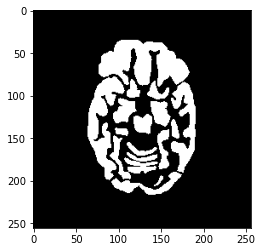

In [30]:
plt.imshow(digi_phantom[40],cmap="gray")

In [ ]:
digi